<h1 style="text-align:center">Mushroom Analysis and Prediction</h1>
<h6 style="text-align:center">The contents of this notebook were developed following crisp-DM standard</h6>

<img src="https://s3-us-west-2.amazonaws.com/myed-prod/books/1421/docbook/resources/images/CRISP-DM.png" style="height:400px; display: block; margin: auto;">


#

# Business Understanding

<h3>The following analysis and modelling was conducted on top of a Dataset from one of the UCI Machine Learning repositories.</h3>

### Description from the original source https://archive.ics.uci.edu/dataset/73/mushroom :
<h3>"This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edible or definitely poisonous, or of unknown edibility and not recommended.  This latter class was combined with the poisonous one.  The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy."</h3>
<h3>In general, the terms used in the Dataset are very straightforward, with no in-depth knowledge required in order to understand them individually as they are directly related to physical characteristics of the mushrooms.  I have previously changed the naming of the categories under each feature for better understanding.</h3>
<h3>The main goal of this project is to perform an in-depth analysis of the problem in order to facilitate the development of a model that can most optimally predict whether a mushroom is poisonous or edible, based on the several features presented.</h3>

### https://archive.ics.uci.edu/dataset/73/mushroom

# Data Understanding and Preparation

In [781]:
import boto3
import pandas as pd
from io import StringIO
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', None)

In [782]:
bucket_name = 'dataset-content-pedrohang'
object_key = 'mushrooms/mushrooms.csv'

s3_uri = f's3://{bucket_name}/{object_key}'
df = pd.read_csv(s3_uri, storage_options={'anon': True})

In [783]:
df

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,convex,smooth,brown,bruises,pungent,free,close,narrow,black,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,black,scattered,urban,p
1,convex,smooth,yellow,bruises,almond,free,close,broad,black,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses,e
2,bell,smooth,white,bruises,anise,free,close,broad,brown,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows,e
3,convex,scaly,white,bruises,pungent,free,close,narrow,brown,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,black,scattered,urban,p
4,convex,smooth,gray,no,none,free,crowded,broad,black,tapering,equal,smooth,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,knobbed,smooth,brown,no,none,attached,close,broad,yellow,enlarging,NaN,smooth,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves,e
8120,convex,smooth,brown,no,none,attached,close,broad,yellow,enlarging,NaN,smooth,smooth,orange,orange,partial,brown,one,pendant,buff,several,leaves,e
8121,flat,smooth,brown,no,none,attached,close,broad,brown,enlarging,NaN,smooth,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves,e
8122,knobbed,scaly,brown,no,fishy,free,close,narrow,buff,tapering,NaN,smooth,silky,white,white,partial,white,one,evanescent,white,several,leaves,p


In [784]:
df.isna().sum()

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
poisonous                      0
dtype: int64

### I'm performing the removal of several features in order to make the modelling more challenging, as the act of leaving these features in the dataset would make model accuracy always 100% when training the set on even a simple classification tree. The goal here is for us to guess whether a mushroom is poisonous or not using the least amount of features possible.

In [786]:
df = df.drop(columns=['odor', 'spore-print-color', 'ring-type', 'gill-color', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'bruises', 'gill-size', 'stalk-color-above-ring', 'stalk-color-below-ring', 'population', 'veil-color', 'cap-surface', 'gill-spacing'])

In [787]:
#df_mushrooms = df.drop(columns=['stalk-root']) # Alternative A: Drop the 'stalk-root' column

#df_mushrooms = df.dropna(subset=['stalk-root']) # Alternative B: Drop rows with missing values in the 'stalk-root' column

most_frequent_value = df['stalk-root'].mode()[0]
df_mushrooms = df.fillna({'stalk-root': most_frequent_value}) # Alternative C: Fill missing values with the mode of 'stalk-root'

In [788]:
df_mushrooms.describe()

,cap-shape,cap-color,gill-attachment,stalk-shape,stalk-root,veil-type,ring-number,habitat,poisonous
count,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,10,2,2,4,1,3,7,2
top,convex,brown,free,tapering,bulbous,partial,one,woods,e
freq,3656,2284,7914,4608,6256,8124,7488,3148,4208


In [789]:
df_mushrooms['poisonous'] = df_mushrooms['poisonous'].map({'e': 0, 'p': 1})

In [790]:
df_mushrooms.drop(columns=['veil-type'], inplace=True)

In [791]:
from scipy.stats import chi2_contingency

#### Cramer's V

##### It is a measure of association between two categorical variables

$$ V = \sqrt{\frac{\chi^2}{n \times (\min(r, k) - 1)}} $$

-  V : Cramér's V, the measure of association between two categorical variables.
-  $\chi^2 $: The Chi-Square statistic, calculated from the contingency table of the two categorical variables.
-  n : The total number of observations in the dataset.
-  r : The number of rows in the contingency table.
-  k : The number of columns in the contingency table.
- $min(r, k)$: The minimum of the number of rows and columns in the contingency table, used to adjust the degrees of freedom.

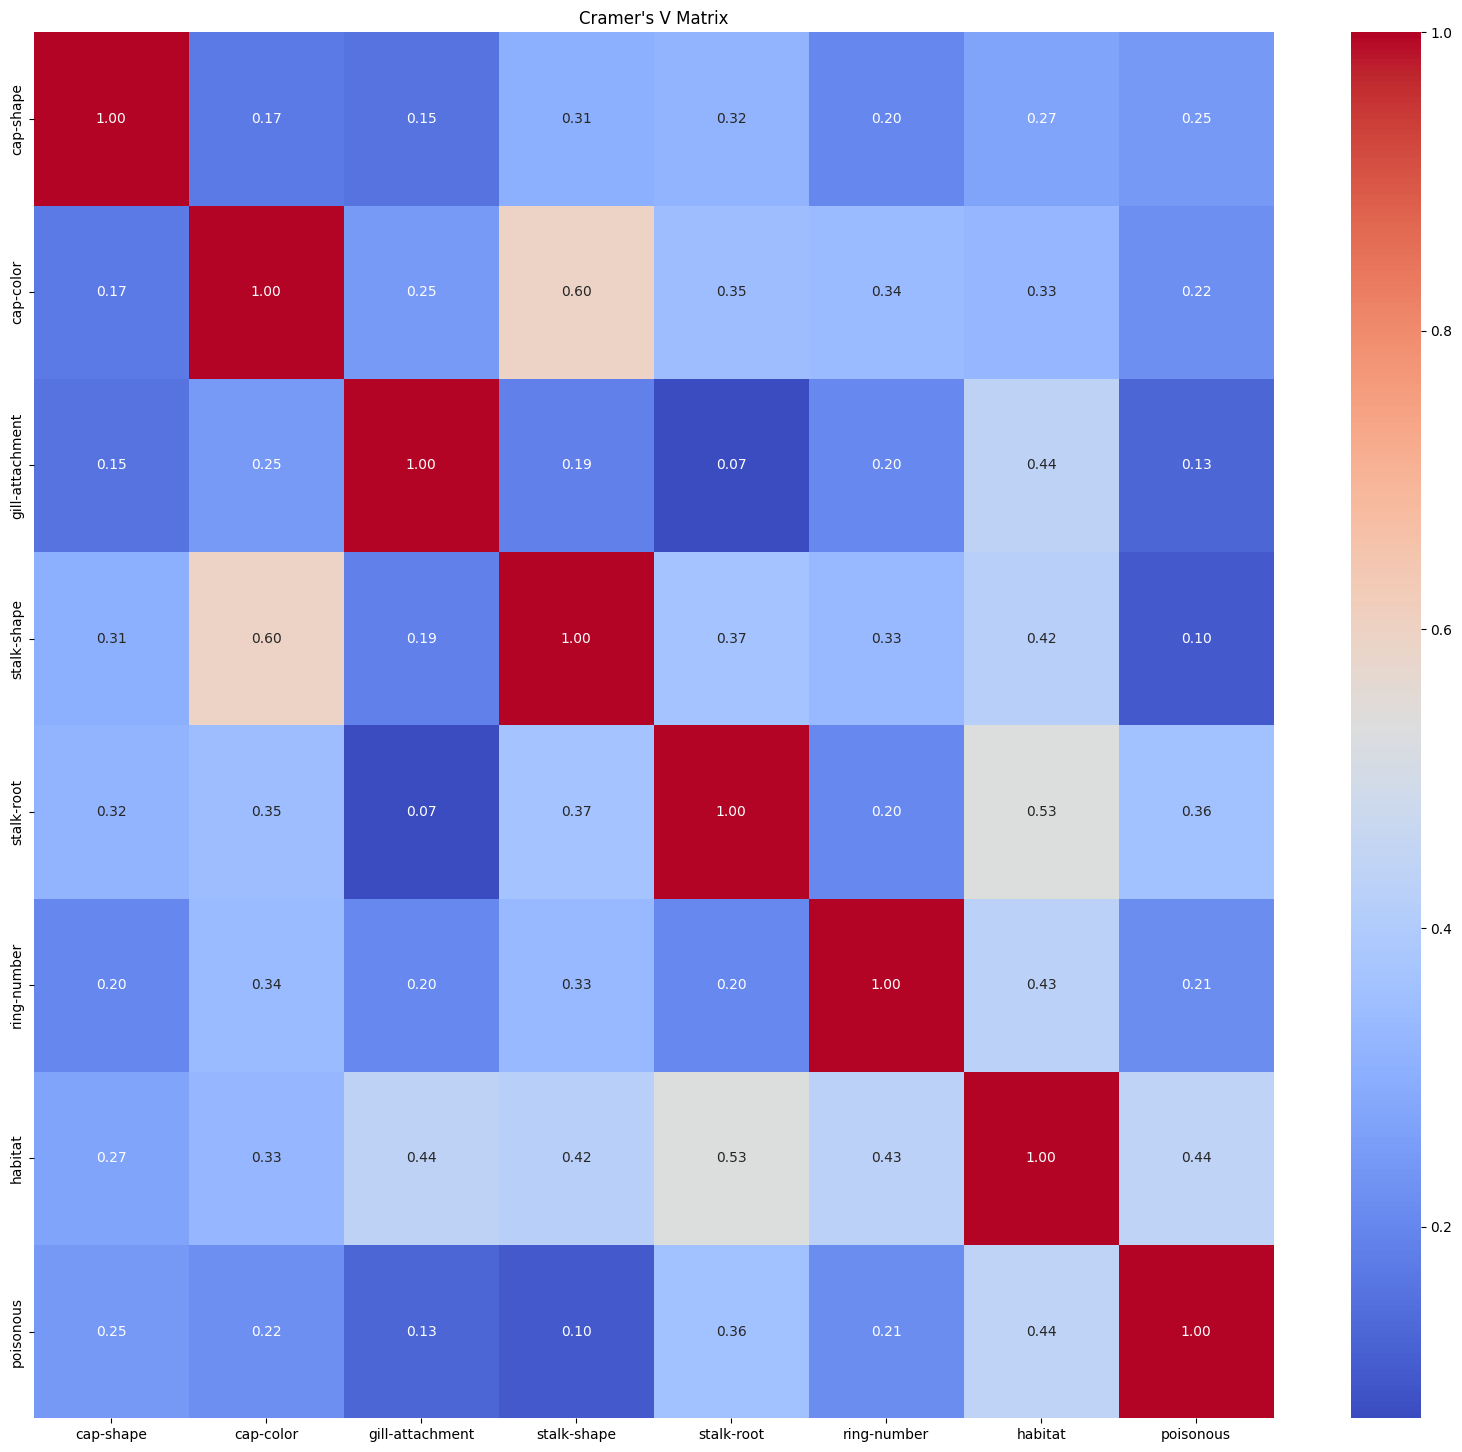

In [795]:
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    if n == 0 or min(r, k) == 1:
        return 0  # Return 0 if there is no data or if the table is degenerate
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))
    
features = df_mushrooms.columns

# Initialize Cramér's V matrix
cramers_v_matrix = pd.DataFrame(index=features, columns=features)

# Calculate Cramér's V for each pair of categorical features
for feature1 in features:
    for feature2 in features:
        confusion_matrix = pd.crosstab(df_mushrooms[feature1], df_mushrooms[feature2])
        cramers_v_matrix.loc[feature1, feature2] = cramers_v(confusion_matrix)

# Convert to float
cramers_v_matrix = cramers_v_matrix.astype(float)

# Plot the Cramér's V matrix
plt.figure(figsize=(20, 18))
sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Cramer\'s V Matrix')
plt.show()

# Modelling

#### Let's start simple, we are first going to train and test the set using a very simple <a link="https://en.wikipedia.org/wiki/Decision_tree">Decision Tree</a>.

In [798]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [799]:
df_dummies = pd.get_dummies(df_mushrooms.drop('poisonous', axis=1))

X = df_dummies
y = df_mushrooms['poisonous']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

In [800]:
clf = DecisionTreeClassifier(random_state=89)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=89)

In [801]:
y_pred = clf.predict(X_test)

# Evaluation

Accuracy: 0.9454470877768663

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      1245
           1       0.99      0.90      0.94      1193

    accuracy                           0.95      2438
   macro avg       0.95      0.94      0.95      2438
weighted avg       0.95      0.95      0.95      2438



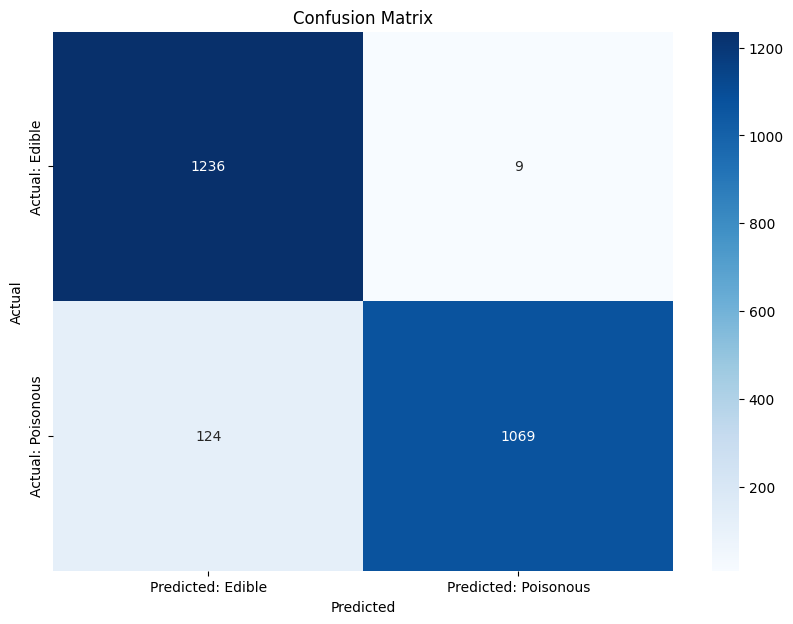

In [803]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: Edible', 'Predicted: Poisonous'], yticklabels=['Actual: Edible', 'Actual: Poisonous'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### Although we got a pretty decent accuracy score for a simple decision tree, we still need to improve it due to the impact that a misleading prediction could cause for this specific case.

#### Since the business and data understanding phases, it is crucial for us to evaluate the impact of potential misleading predictions in our final model. Some domains such as Healthcare, Finances or even problems like mushroom classification cannot afford many mistakes in predictions.

# Modelling

#### We are now going to implement a random forest model to try and improve the accuracy.

In [808]:
from sklearn.ensemble import RandomForestClassifier

In [809]:
df_dummies

,cap-shape_bell,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_knobbed,cap-shape_sunken,cap-color_brown,cap-color_buff,cap-color_cinnamon,cap-color_gray,cap-color_green,cap-color_pink,cap-color_purple,cap-color_red,cap-color_white,cap-color_yellow,gill-attachment_attached,gill-attachment_free,stalk-shape_enlarging,stalk-shape_tapering,stalk-root_bulbous,stalk-root_club,stalk-root_equal,stalk-root_rooted,ring-number_none,ring-number_one,ring-number_two,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False
1,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False
4,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,True,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False
8120,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False
8121,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False
8122,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,True,False,False,True,False,False,False,False,False


In [810]:
X = df_dummies
y = df['poisonous']

In [811]:
rf_clf = RandomForestClassifier(random_state=99)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=99)

In [812]:
y_pred_rf = rf_clf.predict(X_test)

# Evaluation

In [814]:
accuracy = accuracy_score(y_test, y_pred_rf)
report = classification_report(y_test, y_pred_rf)
conf_matrix = confusion_matrix(y_test, y_pred_rf)

In [815]:
print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)

Accuracy: 0.9454470877768663

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      1245
           1       0.99      0.90      0.94      1193

    accuracy                           0.95      2438
   macro avg       0.95      0.94      0.95      2438
weighted avg       0.95      0.95      0.95      2438



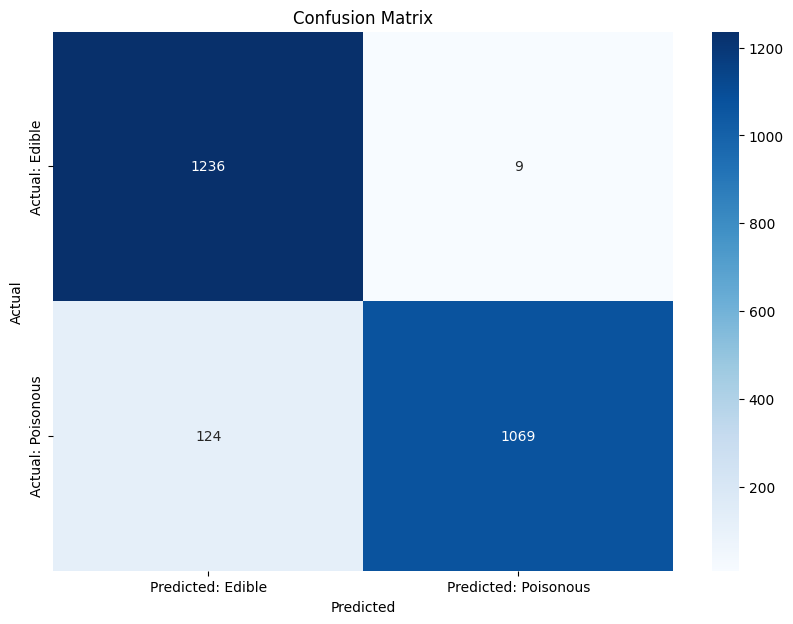

In [816]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: Edible', 'Predicted: Poisonous'], yticklabels=['Actual: Edible', 'Actual: Poisonous'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### Since we did not observe any change using the Random Forest model, we can try a last method in order to train models based on trees: Gridsearch and Cross-Validation in order to tune our hyperparameters.

# Modelling

In [819]:
from sklearn.model_selection import GridSearchCV

In [820]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 89,
 'splitter': 'best'}

In [821]:
rf_clf2 = RandomForestClassifier()

In [822]:
params_grid = {
    'max_depth': [12],
    'min_samples_leaf': [1],
    'n_estimators': list(range(0, 300, 10))
}

#### Here, we are running a GridSearch, which is a method of recursively variating the values for some of out hyperparameters in order to find the optimal value for accuracy. Additionally, we are also running a cross a k-fold cross-validation algorithm, that basically experiments with different train/test splits and then, using an aggregation function, finds an optimal value for the split. Below is an image that explains how K-fold works.

<img src="https://user-images.githubusercontent.com/26833433/258589390-8d815058-ece8-48b9-a94e-0e1ab53ea0f6.png" style="height:400px; display: block; margin: auto;">

In [825]:
grid_rf = GridSearchCV(estimator=rf_clf2,
                       param_grid=params_grid,
                       scoring = 'accuracy',
                       cv = 5)

In [826]:
%%time
grid_rf.fit(X_train, y_train)

CPU times: total: 36.9 s
Wall time: 43.8 s


C:\Users\Hanga\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning:


5 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Hanga\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Hanga\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Hanga\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Hanga\anaconda3\Lib\site-packages\

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [12], 'min_samples_leaf': [1],
                         'n_estimators': [0, 10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100, 110, 120, 130, 140, 150, 160,
                                          170, 180, 190, 200, 210, 220, 230,
                                          240, 250, 260, 270, 280, 290]},
             scoring='accuracy')

# Evaluation

In [828]:
grid_rf.best_estimator_

RandomForestClassifier(max_depth=12, n_estimators=20)

In [829]:
print(grid_rf.best_estimator_.score(X_test, y_test))

0.9454470877768663


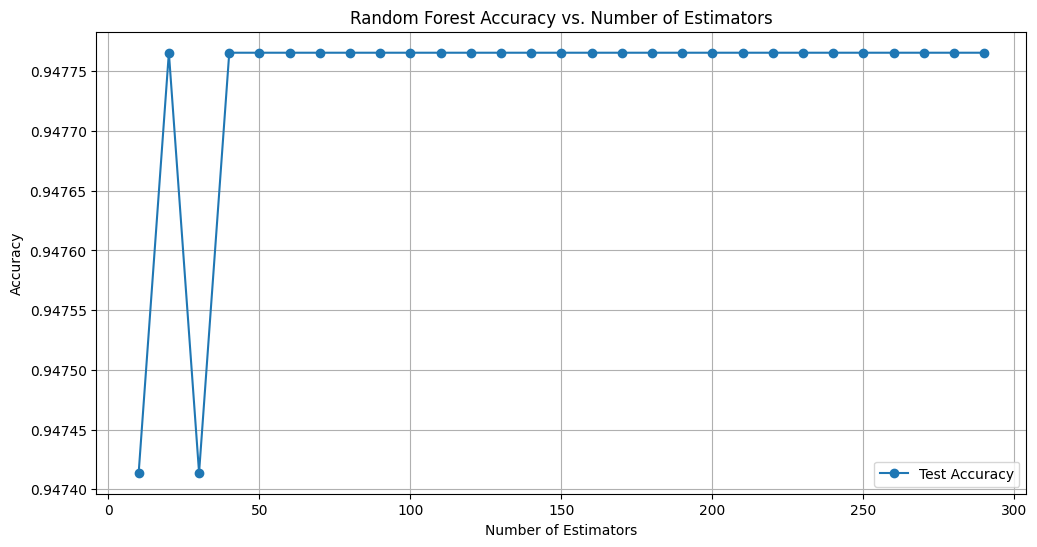

In [830]:
results = grid_rf.cv_results_

mean_test_scores = results['mean_test_score']
n_estimators = params_grid['n_estimators']

plt.figure(figsize=(12, 6))
plt.plot(n_estimators, mean_test_scores, label='Test Accuracy', marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy vs. Number of Estimators')
plt.legend()
plt.grid(True)
plt.show()

#### For now, we have tested enough tree-based models in order to know that our accuracy score will probably remain the same regardless of our attempts to tune our hyperparameters. Now we shall try another approach to modelling.

# Data Preparation

#### Now, we will try to approach the problem using a Logistic Regression algorithm.

<img src="https://images.spiceworks.com/wp-content/uploads/2022/04/11040521/46-4-e1715636469361.png" style="height:400px; display: block; margin: auto;">

 https://www.spiceworks.com/tech/artificial-intelligence/articles/what-is-logistic-regression/

In [836]:
import statsmodels.formula.api as smf

#### Bivariate Analysis

In [838]:
def biv_analysis(df: pd.DataFrame, y_name: str, X_name: str) -> pd.DataFrame:
    tab = pd.crosstab(df[X_name], df[y_name], margins= True)
    tab[f'avg_{y_name}'] = tab[1] / (tab[0] + tab[1])
    tab['odds'] = tab[1] /tab[0]
    tab['odds_ratio'] = tab['odds']/tab.loc['All','odds']
    tab['logit'] = np.log(tab['odds'])
    tab['woe'] = np.log(tab['odds_ratio'])
    return tab

In [839]:
analysis_habitat = biv_analysis(df_mushrooms, 'poisonous', 'habitat')
analysis_habitat

C:\Users\Hanga\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning:

divide by zero encountered in log

C:\Users\Hanga\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning:

divide by zero encountered in log



poisonous,0,1,All,avg_poisonous,odds,odds_ratio,logit,woe
habitat,,,,,,,,
grasses,1408,740,2148,0.344507,0.525568,0.564758,-0.643275,-0.571359
leaves,240,592,832,0.711538,2.466667,2.650596,0.902868,0.974784
meadows,256,36,292,0.123288,0.140625,0.151111,-1.961659,-1.889742
paths,136,1008,1144,0.881119,7.411765,7.964429,2.003069,2.074985
urban,96,272,368,0.739130,2.833333,3.044603,1.041454,1.113371
waste,192,0,192,0.000000,0.000000,0.000000,-inf,-inf
woods,1880,1268,3148,0.402795,0.674468,0.724760,-0.393831,-0.321914
All,4208,3916,8124,0.482029,0.930608,1.000000,-0.071917,0.000000


In [840]:
analysis_cap_color = biv_analysis(df_mushrooms, 'poisonous', 'cap-color')
analysis_cap_color

C:\Users\Hanga\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning:

divide by zero encountered in log

C:\Users\Hanga\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning:

divide by zero encountered in log



poisonous,0,1,All,avg_poisonous,odds,odds_ratio,logit,woe
cap-color,,,,,,,,
brown,1264,1020,2284,0.446585,0.806962,0.867134,-0.214479,-0.142562
buff,48,120,168,0.714286,2.500000,2.686415,0.916291,0.988207
cinnamon,32,12,44,0.272727,0.375000,0.402962,-0.980829,-0.908913
gray,1032,808,1840,0.439130,0.782946,0.841327,-0.244692,-0.172775
green,16,0,16,0.000000,0.000000,0.000000,-inf,-inf
pink,56,88,144,0.611111,1.571429,1.688604,0.451985,0.523902
purple,16,0,16,0.000000,0.000000,0.000000,-inf,-inf
red,624,876,1500,0.584000,1.403846,1.508525,0.339216,0.411132
white,720,320,1040,0.307692,0.444444,0.477585,-0.810930,-0.739013


#### Logistic Regression

In [842]:
df_mushrooms.columns = df_mushrooms.columns.str.replace('-', '_') # Renaming the columns to the format smf supports

In [843]:
df_mushrooms

,cap_shape,cap_color,gill_attachment,stalk_shape,stalk_root,ring_number,habitat,poisonous
0,convex,brown,free,enlarging,equal,one,urban,1
1,convex,yellow,free,enlarging,club,one,grasses,0
2,bell,white,free,enlarging,club,one,meadows,0
3,convex,white,free,enlarging,equal,one,urban,1
4,convex,gray,free,tapering,equal,one,grasses,0
...,...,...,...,...,...,...,...,...
8119,knobbed,brown,attached,enlarging,bulbous,one,leaves,0
8120,convex,brown,attached,enlarging,bulbous,one,leaves,0
8121,flat,brown,attached,enlarging,bulbous,one,leaves,0
8122,knobbed,brown,free,tapering,bulbous,one,leaves,1


In [844]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices, dmatrix

In [845]:
formula = 'poisonous ~ C(cap_shape) + C(cap_color) + C(gill_attachment) + C(stalk_shape) + C(stalk_root) + C(ring_number) + C(habitat)'
y, X = dmatrices(formula, data=df_mushrooms, return_type='dataframe')

In [846]:
# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data

,feature,VIF
0,Intercept,390.923734
1,C(cap_shape)[T.conical],1.022518
2,C(cap_shape)[T.convex],7.712737
3,C(cap_shape)[T.flat],8.067667
4,C(cap_shape)[T.knobbed],3.656338
5,C(cap_shape)[T.sunken],1.249300
6,C(cap_color)[T.buff],1.307948
7,C(cap_color)[T.cinnamon],1.155894
8,C(cap_color)[T.gray],1.824211
9,C(cap_color)[T.green],1.025577


In [847]:
formula_updated = 'poisonous ~ C(cap_shape) + C(cap_color) + C(gill_attachment) + C(stalk_shape) + C(stalk_root)  + C(habitat)'
y_updated, X_updated = dmatrices(formula_updated, data=df_mushrooms, return_type='dataframe')

# Modelling

#### Now, we shall fit the log regression model an then evaluate

In [849]:
model = sm.Logit(y_updated, X_updated)
result = model.fit()
result.summary()

         Current function value: 0.367149
         Iterations: 35


C:\Users\Hanga\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              poisonous   No. Observations:                 8124
Model:                          Logit   Df Residuals:                     8098
Method:                           MLE   Df Model:                           25
Date:                Mon, 15 Jul 2024   Pseudo R-squ.:                  0.4698
Time:                        09:59:32   Log-Likelihood:                -2982.7
converged:                      False   LL-Null:                       -5625.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -7.7793      0.379    -20.538      0.000      -8.522      -7.037
C(cap_shape)[T.conical]       25.6353   1.52e+05      0.000      1.000   -2.97e+05    2.97e+05
C(cap_shape)[T.convex]         2.5968      0.225     11.531      0.000       2.155       3.038
C(cap_shape)[T.flat]           2.7735      0.229     12.086      0.000       2.324       3.223
C(cap_shape)[T.knobbed]        3.6238      0.250     14.491      0.000       3.134       4.114
C(cap_shape)[T.sunken]       -28.8824   5.46e+05  -5.29e-05      1.000   -1.07e+06    1.07e+06
C(cap_color)[T.buff]          26.4253   4.28e+04      0.001      1.000   -8.39e+04     8.4e+04
C(cap_color)[T.cinnamon]      -5.4443      0.404    -13.482      0.000      -6.236      -4.653
C(cap_color)[T.gray]          -0.8667      0.107     -8.085      0.000      -1.077      -0.657
C(cap_color)[T.green]        -24.9044   2.77e+04     -0.001      0.999   -5.43e+04    5.42e+04
C(cap_color)[T.pink]           1.6526      0.456      3.628      0.000       0.760       2.545
C(cap_color)[T.purple]       -24.9044   2.77e+04     -0.001      0.999   -5.43e+04    5.42e+04
C(cap_color)[T.red]            0.2886      0.092      3.153      0.002       0.109       0.468
C(cap_color)[T.white]         -0.5057      0.133     -3.817      0.000      -0.765      -0.246
C(cap_color)[T.yellow]         0.5572      0.162      3.432      0.001       0.239       0.875
C(gill_attachment)[T.free]     6.9147      0.313     22.062      0.000       6.300       7.529
C(stalk_shape)[T.tapering]    -2.5368      0.099    -25.513      0.000      -2.732      -2.342
C(stalk_root)[T.club]         -3.4242      0.229    -14.976      0.000      -3.872      -2.976
C(stalk_root)[T.equal]        -1.8270      0.147    -12.469      0.000      -2.114      -1.540
C(stalk_root)[T.rooted]      -25.0146   1849.201     -0.014      0.989   -3649.381    3599.352
C(habitat)[T.leaves]           2.7374      0.190     14.405      0.000       2.365       3.110
C(habitat)[T.meadows]         -0.8808      0.316     -2.787      0.005      -1.500      -0.261
C(habitat)[T.paths]            3.2251      0.206     15.670      0.000       2.822       3.628
C(habitat)[T.urban]            2.0297      0.167     12.154      0.000       1.702       2.357
C(habitat)[T.waste]          -46.3609   4.28e+04     -0.001      0.999    -8.4e+04    8.39e+04
C(habitat)[T.woods]           -0.1501      0.116     -1.297      0.195      -0.377       0.077
==============================================================================================
"""

In [850]:
df_mushrooms['predicted_prob'] = result.predict(X_updated)

In [851]:
df_mushrooms

,cap_shape,cap_color,gill_attachment,stalk_shape,stalk_root,ring_number,habitat,poisonous,predicted_prob
0,convex,brown,free,enlarging,equal,one,urban,1,0.873787
1,convex,yellow,free,enlarging,club,one,grasses,0,0.243245
2,bell,white,free,enlarging,club,one,meadows,0,0.003417
3,convex,white,free,enlarging,equal,one,urban,1,0.806764
4,convex,gray,free,tapering,equal,one,grasses,0,0.029358
...,...,...,...,...,...,...,...,...,...
8119,knobbed,brown,attached,enlarging,bulbous,one,leaves,0,0.194952
8120,convex,brown,attached,enlarging,bulbous,one,leaves,0,0.079790
8121,flat,brown,attached,enlarging,bulbous,one,leaves,0,0.093762
8122,knobbed,brown,free,tapering,bulbous,one,leaves,1,0.950721


# Evaluation

In [853]:
import plotly.express as px
from sklearn.metrics import accuracy_score

In [854]:
df_mushrooms['predicted_class'] = (df_mushrooms['predicted_prob'] > 0.5).astype(int)

In [855]:
accuracy = accuracy_score(df_mushrooms['poisonous'], df_mushrooms['predicted_class'])
print(f'Accuracy Score: {accuracy:.4f}')

Accuracy Score: 0.8791


In [927]:
conf_matrix = confusion_matrix(df_mushrooms['poisonous'], df_mushrooms['predicted_class'])

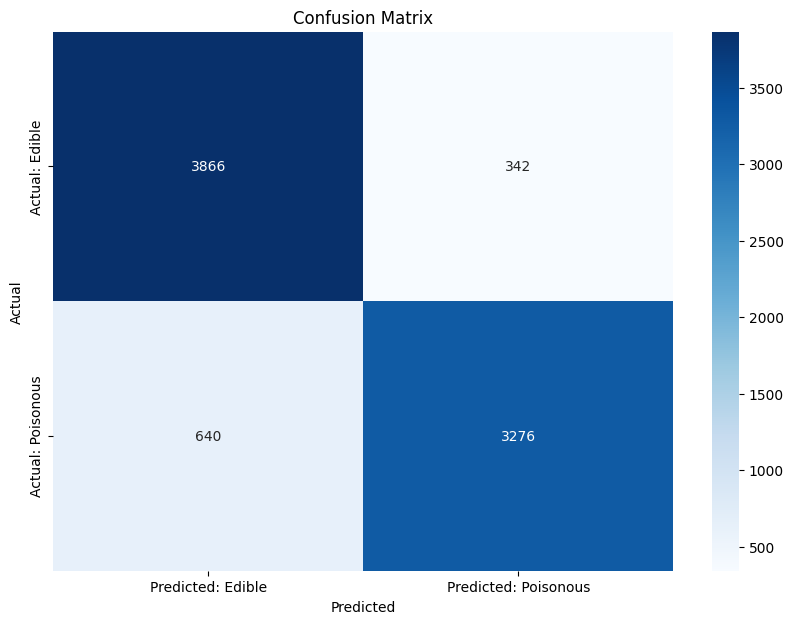

In [929]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: Edible', 'Predicted: Poisonous'], yticklabels=['Actual: Edible', 'Actual: Poisonous'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Modelling

In [917]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [919]:
y_updated = y_updated.values.ravel()

In [921]:
model = LogisticRegression(penalty='l2', solver='liblinear')
model.fit(X_updated, y_updated)

LogisticRegression(solver='liblinear')

In [923]:
predicted = model.predict(X_updated)
accuracy = accuracy_score(y_updated, predicted)
print(f'Accuracy Score with L2 Regularization: {accuracy:.4f}')

Accuracy Score with L2 Regularization: 0.8624


In [931]:
conf_matrix = confusion_matrix(df_mushrooms['poisonous'], predicted)

# Evaluation

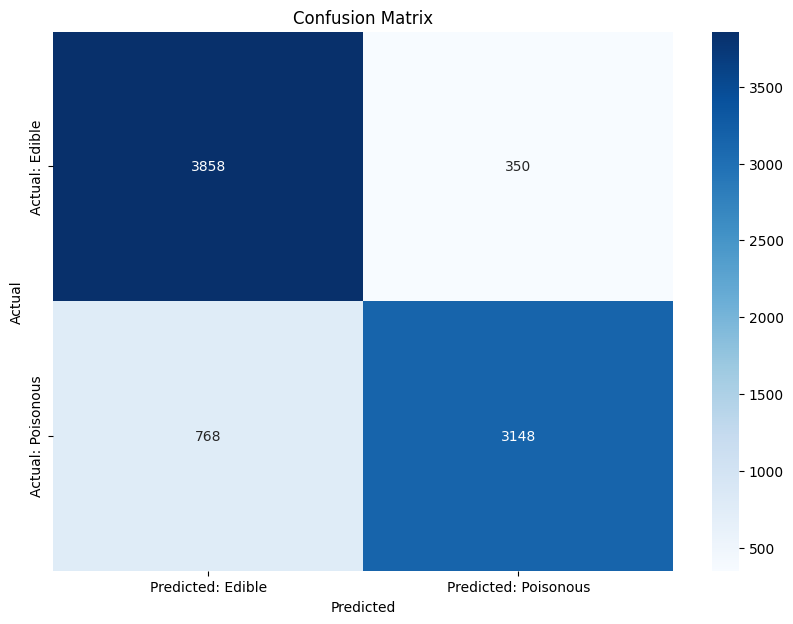

In [933]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: Edible', 'Predicted: Poisonous'], yticklabels=['Actual: Edible', 'Actual: Poisonous'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [925]:
scores = cross_val_score(model, X_updated, y_updated, cv=60, scoring='accuracy')
print(f'Cross-Validation Accuracy Scores: {scores}')
print(f'Average Cross-Validation Accuracy: {scores.mean():.4f}')

Cross-Validation Accuracy Scores: [0.75735294 0.71323529 0.69852941 0.76470588 0.97794118 0.97058824
 0.94117647 0.96323529 0.95588235 0.97058824 0.97058824 0.96323529
 0.98529412 0.97058824 0.99264706 0.96323529 0.98529412 1.
 0.99264706 0.99264706 0.99264706 0.93382353 0.95588235 1.
 1.         0.91851852 0.8962963  0.88888889 0.8962963  0.87407407
 0.85925926 0.92592593 0.87407407 0.85925926 0.8962963  0.87407407
 0.84444444 0.84444444 0.86666667 0.82962963 0.87407407 0.86666667
 0.82222222 0.87407407 0.82222222 0.82222222 0.82962963 0.8962963
 0.8        0.77777778 0.75555556 0.71111111 0.68888889 0.6
 0.60740741 0.67407407 0.62222222 0.66666667 0.63703704 0.78518519]
Average Cross-Validation Accuracy: 0.8616


# Conclusion

#### We have tried several techniques, from simple clf trees to more advanced logistic regression with l2 regularization and cross-validation. Even with all these advanced techniques, a simple classification tree presented the best "score/effort" relationship, but we had to try other models in order to reach that conclusion.

#### Sometimes, when training ML algorithms, we need to think about the complexity of the data we are working with in order to select the most appropriate model for it. In our case, a classification tree with default settings was the model t